In [1]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries 
import seaborn as sns
import matplotlib.pyplot as plt
# Import Data Filter Warning libraries 
import warnings
warnings.filterwarnings('ignore')

# Import Logging Libraries
import logging
logging.basicConfig(level= logging.INFO,
                    filemode = 'w',
                    filename = 'model.log',
                    format = '%(asctime)s - %(levelname)s - %(message)s')
# Import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Import Dataset using Pandas
df = pd.read_csv('loan_data.csv')
df.sample(frac = 0.10) # Shuffling 10% of the dataset

person_age person_gender person_education  person_income  \
22129          27        female         Bachelor          63656   
6713           22          male         Bachelor          60952   
473            22          male         Bachelor          22786   
30455          36          male         Bachelor          59381   
27203          28        female        Associate         152002   
...           ...           ...              ...            ...   
697            25        female        Associate          71754   
25961          30        female        Doctorate         113669   
35902          28        female      High School          48883   
9416           23        female        Associate          75266   
10517          24        female        Associate          82775   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
22129               7              MORTGAGE       5000  DEBTCONSOLIDATION   
6713                1                   OWN       5600          EDUCATION   
473                 0                   OWN       5400            MEDICAL   
30455              12                  RENT       7000    HOMEIMPROVEMENT   
27203               8              MORTGAGE      12000    HOMEIMPROVEMENT   
...               ...                   ...        ...                ...   
697                 4                  RENT      20000           PERSONAL   
25961               8              MORTGAGE      10000          EDUCATION   
35902               0                  RENT       1719            MEDICAL   
9416                0                   OWN       5575            VENTURE   
10517               3              MORTGAGE       4200    HOMEIMPROVEMENT   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
22129           7.75                 0.08                           7   
6713           11.86                 0.09                           2   
473            15.31                 0.24                           2   
30455          10.74                 0.12                          16   
27203          11.71                 0.08                           7   
...              ...                  ...                         ...   
697            14.84                 0.28                           2   
25961          14.27                 0.09                           6   
35902          11.31                 0.04                           8   
9416           11.01                 0.07                           3   
10517           5.42                 0.05                           4   

       credit_score previous_loan_defaults_on_file  loan_status  
22129           663                            Yes            0  
6713            602                            Yes            0  
473             647                             No            1  
30455           620                             No            1  
27203           509                            Yes            0  
...             ...                            ...          ...  
697             540                             No            1  
25961           662                            Yes            0  
35902           613                            Yes            0  
9416            603                             No            0  
10517           544                            Yes            0  

[4500 rows x 14 columns]

In [3]:
# Problem  Defintion:
'''
1. To predict whether the person is eligible to approve loan or not
2. To Understand the Business Model and provide a suitable solution for the same.
'''
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

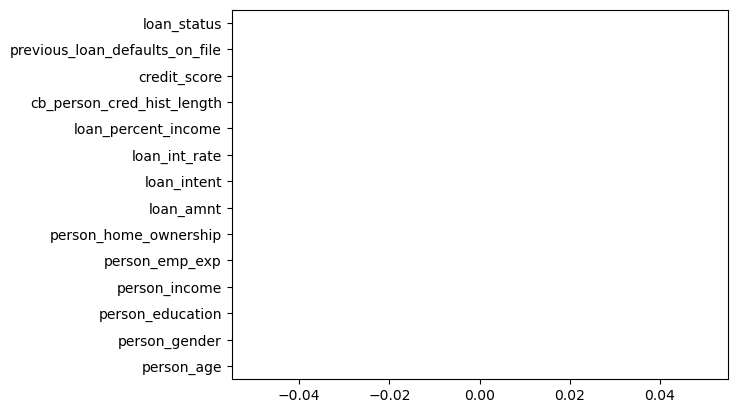

In [4]:
# Checking Null Values Stats using Graphical Method 
df.isnull().sum().plot(kind = 'barh')
plt.show()

In [5]:
# Segregate Categorical and Numerical Columns
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [6]:
df

person_age person_gender person_education  person_income  \
0              22        female           Master          71948   
1              21        female      High School          12282   
2              25        female      High School          12438   
3              23        female         Bachelor          79753   
4              24          male           Master          66135   
...           ...           ...              ...            ...   
44995          27          male        Associate          47971   
44996          37        female        Associate          65800   
44997          33          male        Associate          56942   
44998          29          male         Bachelor          33164   
44999          24          male      High School          51609   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT      35000           PERSONAL   
1                   0                   OWN       1000          EDUCATION   
2                   3              MORTGAGE       5500            MEDICAL   
3                   0                  RENT      35000            MEDICAL   
4                   1                  RENT      35000            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT      15000            MEDICAL   
44996              17                  RENT       9000    HOMEIMPROVEMENT   
44997               7                  RENT       2771  DEBTCONSOLIDATION   
44998               4                  RENT      12000          EDUCATION   
44999               1                  RENT       6665  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                           3   
1              11.14                 0.08                           2   
2              12.87                 0.44                           3   
3              15.23                 0.44                           2   
4              14.27                 0.53                           4   
...              ...                  ...                         ...   
44995          15.66                 0.31                           3   
44996          14.07                 0.14                          11   
44997          10.02                 0.05                          10   
44998          13.23                 0.36                           6   
44999          17.05                 0.13                           3   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [7]:
categorical_col 

person_gender person_education person_home_ownership        loan_intent  \
0            female           Master                  RENT           PERSONAL   
1            female      High School                   OWN          EDUCATION   
2            female      High School              MORTGAGE            MEDICAL   
3            female         Bachelor                  RENT            MEDICAL   
4              male           Master                  RENT            MEDICAL   
...             ...              ...                   ...                ...   
44995          male        Associate                  RENT            MEDICAL   
44996        female        Associate                  RENT    HOMEIMPROVEMENT   
44997          male        Associate                  RENT  DEBTCONSOLIDATION   
44998          male         Bachelor                  RENT          EDUCATION   
44999          male      High School                  RENT  DEBTCONSOLIDATION   

      previous_loan_defaults_on_file  
0                                 No  
1                                Yes  
2                                 No  
3                                 No  
4                                 No  
...                              ...  
44995                             No  
44996                             No  
44997                             No  
44998                             No  
44999                             No  

[45000 rows x 5 columns]

In [8]:
numerical_col

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0              22          71948               0      35000          16.02   
1              21          12282               0       1000          11.14   
2              25          12438               3       5500          12.87   
3              23          79753               0      35000          15.23   
4              24          66135               1      35000          14.27   
...           ...            ...             ...        ...            ...   
44995          27          47971               6      15000          15.66   
44996          37          65800              17       9000          14.07   
44997          33          56942               7       2771          10.02   
44998          29          33164               4      12000          13.23   
44999          24          51609               1       6665          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                           3           561   
1                     0.08                           2           504   
2                     0.44                           3           635   
3                     0.44                           2           675   
4                     0.53                           4           586   
...                    ...                         ...           ...   
44995                 0.31                           3           645   
44996                 0.14                          11           621   
44997                 0.05                          10           668   
44998                 0.36                           6           604   
44999                 0.13                           3           628   

       loan_status  
0                1  
1                0  
2                1  
3                1  
4                1  
...            ...  
44995            1  
44996            1  
44997            1  
44998            1  
44999            1  

[45000 rows x 9 columns]

In [9]:
# Explorartory Data Analysis 
# Univariate Analysis
'''
step 1: Create Blank list : stats[]
step 2: Using OrderedDict create dictionary
step 3: Append List :stats[]
step 4: convert appended list into Dataframe
'''
from collections import OrderedDict

stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Count':df[i].count(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Maximum':df[i].max(),
        'Minimum':df[i].min(),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurt(),
        'Skewness':df[i].skew()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

Feature  Count          Mean    Median        Q1  \
0                  person_age  45000     27.764178     26.00     24.00   
1               person_income  45000  80319.053222  67048.00  47204.00   
2              person_emp_exp  45000      5.410333      4.00      1.00   
3                   loan_amnt  45000   9583.157556   8000.00   5000.00   
4               loan_int_rate  45000     11.006606     11.01      8.59   
5         loan_percent_income  45000      0.139725      0.12      0.07   
6  cb_person_cred_hist_length  45000      5.867489      4.00      3.00   
7                credit_score  45000    632.608756    640.00    601.00   
8                 loan_status  45000      0.222222      0.00      0.00   

         Q3       IQR     Maximum  Minimum  Standard Deviation     Kurtosis  \
0     30.00      6.00      144.00    20.00            6.045108    18.649449   
1  95789.25  48585.25  7200766.00  8000.00        80422.498632  2398.684769   
2      8.00      7.00      125.00     0.00            6.063532    19.168324   
3  12237.25   7237.25    35000.00   500.00         6314.886691     1.351215   
4     12.99      4.40       20.00     5.42            2.978808    -0.420335   
5      0.19      0.12        0.66     0.00            0.087212     1.082416   
6      8.00      5.00       30.00     2.00            3.879702     3.725945   
7    670.00     69.00      850.00   390.00           50.435865     0.203022   
8      0.00      0.00        1.00     0.00            0.415744    -0.214176   

    Skewness  
0   2.548154  
1  34.137583  
2   2.594917  
3   1.179731  
4   0.213784  
5   1.034512  
6   1.631720  
7  -0.610261  
8   1.336351

In [10]:
# Use Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [11]:
'''
step 1: Split the dataset into X and y 
step 2: Split the dataset into train and test
step 3: Try Balancing method for target column
step 4: Scaling Technique
step 5: Model Building
'''

# Step 1
X = df.drop(columns = 'loan_status',axis = 1)
y = df['loan_status']

# Step 2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

# Step 3
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

# Step 4
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 5
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9019259259259259
